In [4]:
from ISR.models import RDN, RRDN
model1 = RDN(weights='noise-cancel')
#model3 = RDN(weights='psnr-small')

c:\Users\rafae\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


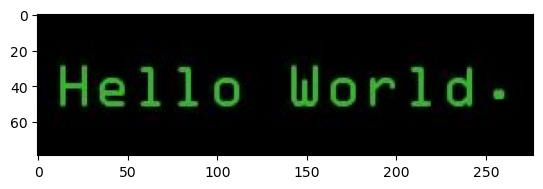

In [5]:
##pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pytesseract import pytesseract
from PIL import Image

'./teste1.JPG'
'./runs/detect/TESTE_OCR/crops/License-Plate/parada_159.jpg'
'./outputs/Trim1/Trim1_42.jpg'
'./outputs/fiat2/fiat2_72.jpg'
'./outputs/parada/parada_158.jpg'
'./outputs/fiat10/fiat10_87.jpg'

path ='./outputs/teste2.jpg'
img = cv2.imread(path)
assert img is not None, "file could not be read"
#img=cv2.resize(img, (250, 110),interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#Comparativo entre tipos de interpolation no resize (Colocar no TCC)
fig = plt.figure(figsize=(20, 10)) 
rows = 2
columns = 2
Image1 = cv2.resize(img, (250, 100),interpolation = cv2.INTER_NEAREST) 
Image2 = cv2.resize(img, (250, 100),interpolation = cv2.INTER_LINEAR) 
Image3 = cv2.resize(img, (250, 100),interpolation = cv2.INTER_CUBIC) 
Image4 = cv2.resize(img, (250, 100),interpolation = cv2.INTER_AREA) 
fig.add_subplot(rows, columns, 1) 
plt.imshow(Image1) 
plt.axis('off') 
plt.title("INTER_NEAREST",fontsize = 40) 
fig.add_subplot(rows, columns, 2) 
plt.imshow(Image2) 
plt.axis('off') 
plt.title("INTER_LINEAR",fontsize = 40) 
fig.add_subplot(rows, columns, 3) 
plt.imshow(Image3) 
plt.axis('off') 
plt.title("INTER_CUBIC ",fontsize = 40) 
fig.add_subplot(rows, columns, 4) 
plt.imshow(Image4) 
plt.axis('off')
plt.title("INTER_AREA",fontsize = 40) 

1/1 [==============================] - 41s 41s/step


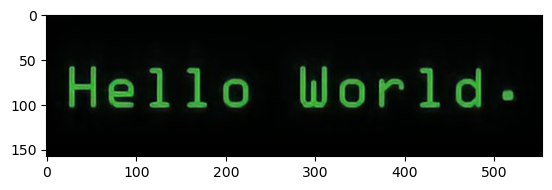

In [6]:
#noise-cancel
img = model1.predict(np.array(img))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#psnr-small
img = model3.predict(np.array(img))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#edsr
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = './SR/EDSR/EDSR_x4.pb'
sr.readModel(path)
sr.setModel("edsr",4)
img = sr.upsample(img)
# SR upscaled
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#lapsrn

sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = './SR/LapSRN/LapSRN_x8.pb'
sr.readModel(path)
sr.setModel("lapsrn",8)
img = sr.upsample(img)
# SR upscaled
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

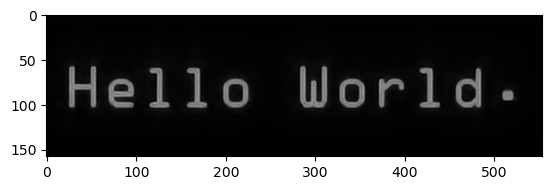

In [7]:
cinza = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(cinza, cv2.COLOR_BGR2RGB))

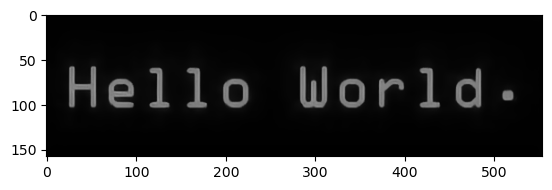

In [8]:
bfilter = cv2.bilateralFilter(cinza,11, 11, 75)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

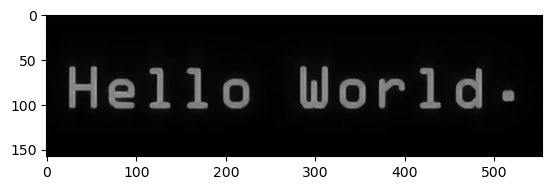

In [9]:
kernel1 = np.ones((2,2),np.uint8)
dilate=cv2.dilate(bfilter, kernel1, iterations = 1)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))

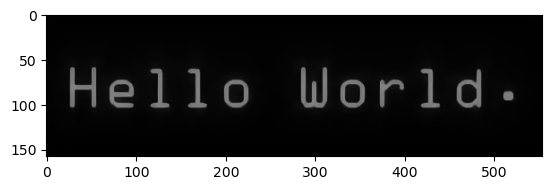

In [10]:
kernel2 = np.ones((2,2),np.uint8)
erode=cv2.erode(bfilter, kernel2, iterations = 1)
plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB))

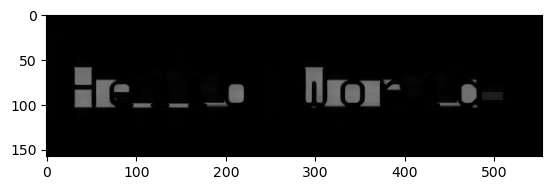

In [11]:
#blackhat morphological operation to reveal dark characters (letters, digits, and symbols) against light backgrounds (the license plate itself). 
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
blackhat = cv2.morphologyEx(erode, cv2.MORPH_BLACKHAT, rectKern)
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB))		

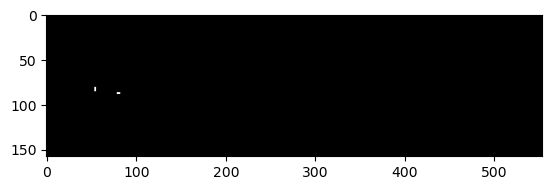

In [12]:
#th1  127, 255
ret,th1 = cv2.threshold(dilate,155,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(th1, cv2.COLOR_BGR2RGB))

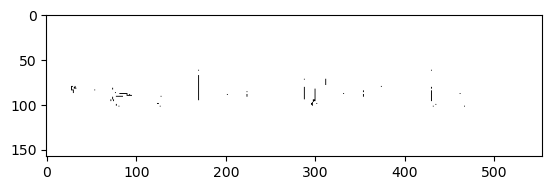

In [13]:
#thresh inverso  65, 255
_,thresh = cv2.threshold(erode, 130, 300, cv2.THRESH_BINARY_INV)
#_,thresh = cv2.threshold(blackhat, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

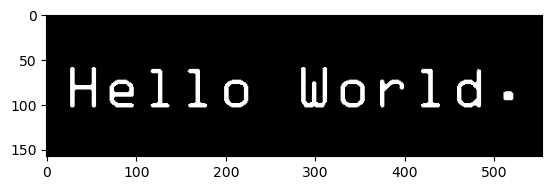

In [14]:
# th4 Otsu's thresholding
ret2,th4 = cv2.threshold(erode,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(th4, cv2.COLOR_BGR2RGB))

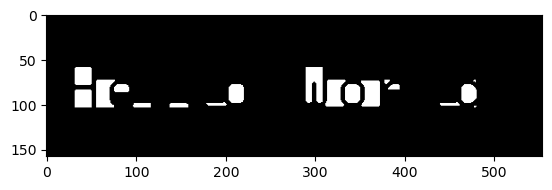

In [15]:
# th5 Otsu's thresholding after Gaussian filtering
#blur = cv2.GaussianBlur(cinza,(5,5),0)
blur = cv2.GaussianBlur(blackhat,(5,5),0)
ret3,th5 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(th5, cv2.COLOR_BGR2RGB))

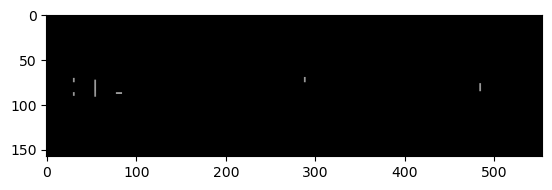

In [16]:
ret, th7 = cv2.threshold(dilate, 150, 255, cv2.THRESH_TOZERO)
plt.imshow(cv2.cvtColor(th7, cv2.COLOR_BGR2RGB))

In [17]:
#Funçoes
import string

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '0', #default=6
                    'S': '5'}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}


def write_csv(results, output_path):
    """
    Write the results to a CSV file.

    Args:
        results (dict): Dictionary containing the results.
        output_path (str): Path to the output CSV file.
    """
    with open(output_path, 'w') as f:
        f.write('{},{},{},{},{},{},{}\n'.format('frame_nmr', 'car_id', 'car_bbox',
                                                'license_plate_bbox', 'license_plate_bbox_score', 'license_number',
                                                'license_number_score'))

        for frame_nmr in results.keys():
            for car_id in results[frame_nmr].keys():
                print(results[frame_nmr][car_id])
                if 'car' in results[frame_nmr][car_id].keys() and \
                   'license_plate' in results[frame_nmr][car_id].keys() and \
                   'text' in results[frame_nmr][car_id]['license_plate'].keys():
                    f.write('{},{},{},{},{},{},{}\n'.format(frame_nmr,
                                                            car_id,
                                                            '[{} {} {} {}]'.format(
                                                                results[frame_nmr][car_id]['car']['bbox'][0],
                                                                results[frame_nmr][car_id]['car']['bbox'][1],
                                                                results[frame_nmr][car_id]['car']['bbox'][2],
                                                                results[frame_nmr][car_id]['car']['bbox'][3]),
                                                            '[{} {} {} {}]'.format(
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][0],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][1],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][2],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][3]),
                                                            results[frame_nmr][car_id]['license_plate']['bbox_score'],
                                                            results[frame_nmr][car_id]['license_plate']['text'],
                                                            results[frame_nmr][car_id]['license_plate']['text_score'])
                            )
        f.close()


def license_complies_format(text):
    """
    Check if the license plate text complies with the required format.

    Args:
        text (str): License plate text.

    Returns:
        bool: True if the license plate complies with the format, False otherwise.
    """
    if len(text) != 7:
        return False

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in string.ascii_uppercase or text[2] in dict_int_to_char.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[5] in dict_char_to_int.keys()) and \
       (text[6] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[6] in dict_char_to_int.keys()):
        return True
    else:
        return False


def format_license(text):
    """
    Format the license plate text by converting characters using the mapping dictionaries.

    Args:
        text (str): License plate text.

    Returns:
        str: Formatted license plate text.
    """
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_char_to_int, 6: dict_char_to_int,
               2: dict_int_to_char, 3: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_


def read_license_plate(license_plate_crop):
    """
    Read the license plate text from the given cropped image.

    Args:
        license_plate_crop (PIL.Image.Image): Cropped image containing the license plate.

    Returns:
        tuple: Tuple containing the formatted license plate text and its confidence score.
    """

    detections = pytesseract.image_to_string(license_plate_crop, config='--psm 9 --oem 2 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVXWYZ0123456789')
    #print(detections)
    for detection in detections:
        #print(detection)
        text = detections
        text = text.strip()
        if license_complies_format(text):
            return format_license(text) 
    
    return None


def get_car(license_plate, vehicle_track_ids):
    """
    Retrieve the vehicle coordinates and ID based on the license plate coordinates.

    Args:
        license_plate (tuple): Tuple containing the coordinates of the license plate (x1, y1, x2, y2, score, class_id).
        vehicle_track_ids (list): List of vehicle track IDs and their corresponding coordinates.

    Returns:
        tuple: Tuple containing the vehicle coordinates (x1, y1, x2, y2) and ID.
    """
    x1, y1, x2, y2, score, class_id = license_plate

    foundIt = False
    for j in range(len(vehicle_track_ids)):
        xcar1, ycar1, xcar2, ycar2, car_id = vehicle_track_ids[j]

        if x1 > xcar1 and y1 > ycar1 and x2 < xcar2 and y2 < ycar2:
            car_indx = j
            foundIt = True
            break

    if foundIt:
        return vehicle_track_ids[car_indx]

    return -1, -1, -1, -1, -1

In [18]:
#RESULTADO DA LEITURA DE PLACA COM DIFERENTES FILTROS
texto1=read_license_plate(img)
texto2=read_license_plate(cinza)
texto3=read_license_plate(bfilter)
texto4=read_license_plate(thresh)
texto5=read_license_plate(th1)
texto6=read_license_plate(blackhat)
texto7=read_license_plate(th4)
texto8=read_license_plate(th5)
texto9=read_license_plate(th7)
texto10=read_license_plate(dilate)
texto11=read_license_plate(erode)

print("img:",texto1)
print("cinza:",texto2)
print("bfilter:",texto3)
print("Dilate:",texto10)
print("Erode:",texto11)
print("thresh:",texto4)
print("th1:",texto5)
print("blackhat:",texto6)
print("th4:",texto7)
print("th5:",texto8)
print("th7:",texto9)


img: None
cinza: None
bfilter: None
Dilate: None
Erode: None
thresh: None
th1: None
blackhat: None
th4: None
th5: None
th7: None


In [19]:
# Initialize Tesseract

caminho= "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

pytesseract.tesseract_cmd = caminho
custom_config='--oem 1 --psm 9 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVXWYZ0123456789'
#USAR --PSM 7 ou --PSM 9(Melhor resultado)

texto12=pytesseract.image_to_string(img, config=custom_config)
texto13=pytesseract.image_to_string(cinza, config=custom_config)
texto14=pytesseract.image_to_string(bfilter, config=custom_config)
texto16=pytesseract.image_to_string(blackhat, config=custom_config)
texto17=pytesseract.image_to_string(thresh, config=custom_config)
texto18=pytesseract.image_to_string(th1, config=custom_config)
texto21=pytesseract.image_to_string(th4, config=custom_config)
texto22=pytesseract.image_to_string(th5, config=custom_config)
texto23=pytesseract.image_to_string(th7, config=custom_config)
texto24=pytesseract.image_to_string(dilate, config=custom_config)
texto25=pytesseract.image_to_string(erode, config=custom_config)

print("img:",texto12)
print("cinza:",texto13)
print("bfilter:",texto14)
print("Dilatação:",texto24)
print("Erosão:",texto25)
print("blackhat:",texto16)
print("thresh:",texto17)
print("th1:",texto18)
print("th4:",texto21)
print("th5:",texto22)
print("th7:",texto23)

img: 110WO1

cinza: HW

bfilter: HW

Dilatação: HW0

Erosão: 110WWO1

blackhat: 
thresh: TL

th1: CL

th4: 110W1

th5: 
th7: ST

